# Summary

The analysis's primary goal is to concentrate on prediction. In order to determine the relationship between the overall number of deaths, the human development index, and the common GDP, we will use linear regression techniques in this project. After that, we will select the top candidate algorithm based on early findings. Building a model that precisely forecasts the impact of each nation's global economy is the aim of this implementation.

# Exploratory Data Analysis

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV, ElasticNetCV 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore', module='sklearn')



In [88]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV, ElasticNetCV 

In [54]:
data = pd.read_csv('C:/Users/arutherford/Documents/Python Scripts/kc_house_data.csv', sep=',')
#data = data.rename(columns={'human_development_index':'hdi'})
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [56]:
print('The total number of records: '+str(len(data.index)))
print('Column names: '+str(data.columns.tolist()))
print('Number of missing values: \n' + str(data.isnull().sum()))

The total number of records: 21613
Column names: ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
Number of missing values: 
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


## Featureset Exploration

**iso_code**: country code

**location**: name of the country

**date**

**total_cases**: number of COVID19 cases

**total_deaths**

**stringency_index**:  The Stringency Index provides a computable parameter to evaluate the effectiveness of the nationwide lockdown. It is used by the Oxford COVID-19 Government Response Tracker with a database of 17 indicators of government response such as school and workplace closings, public events, public transport, stay-at-home policies. The Stringency Index is a number from 0 to 100 that reflects these indicators. A higher index score indicates a higher level of stringency.

**population**

**gdp_per_capita**: A country's GDP or gross domestic product is calculated by taking into account the monetary worth of a nation's goods and services after a certain period of time, usually one year. It's a measure of economic activity.

**hdi**: The HDI was created to emphasize that people and their capabilities should be the ultimate criteria for assessing the development of a country, not economic growth alone. The Human Development Index (HDI) is a summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and have a decent standard of living. The HDI is the geometric mean of normalized indices for each of the three dimensions.

## Preparing the Data

The following columns contain missing values: total_cases, total_deaths, stringency_index, population, gdp_per_capita, hdi. I decided to drop the rows with missing data as we would still have enough data(31518) to train our models.

In [57]:

#data = data.drop(['iso_code', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'], axis = 1)

data = data.drop(['date'], axis = 1)

In [58]:
data = data.dropna(axis = 0)
data.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [48]:
len(data)

21613

Let's look at the correlation coefficient. A coefficient close to 1 means that there’s a very strong positive correlation between the two variables. The diagonal line is the correlation of the variables to themselves, that's why they are 1.

In our case we can quickly see that:
The Human Development Index (HDI) is strongly correlated to the GDP per Capita and total number case to deaths.
The population also has a strong correlation to the number of total cases and deaths. This is what we expected. A high population will have a higher number of cases and deaths.
What we are looking for is the relationship between GDP per capita(or HDI) and total number of cases or deaths.

<Axes: >

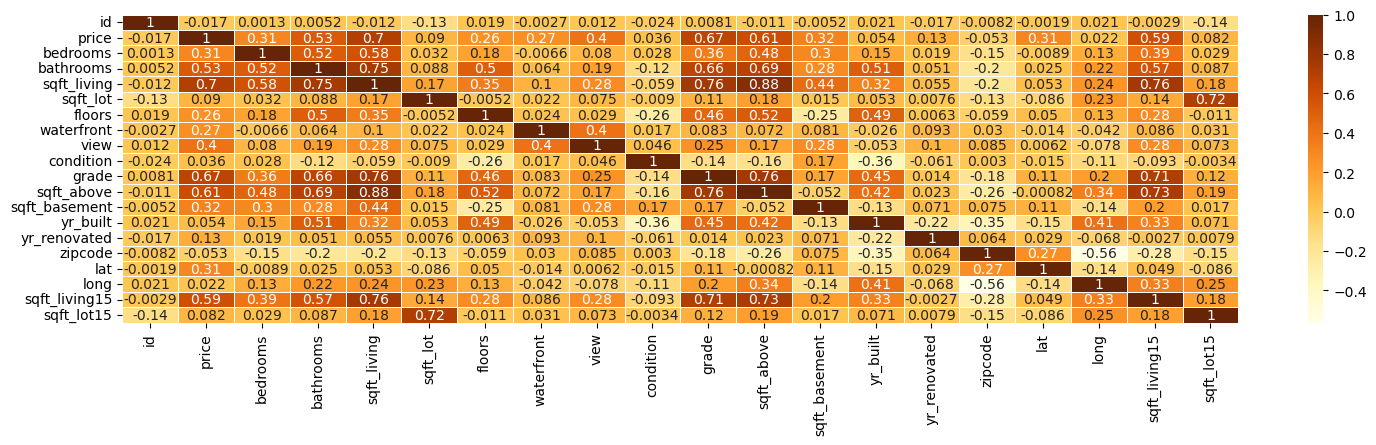

In [59]:
corr = data.corr(method='pearson')
fig = plt.subplots(figsize = (18, 4))
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='YlOrBr',
            annot=True,
            linewidth=0.5)

From the heatmap it seems like those with the most correlation with price are **sqft_living**, **bathrooms**, **grade**, and **sqft_above**, and **sq_ft_living15**. 

In [60]:
#gdp_transformed = data['gdp_per_capita'].apply(lambda x: np.log(x + 1))

#total_deaths_transformed = data['total_deaths'].apply(lambda x: np.log(x + 1))

price_transformed = np.log(data['price'])

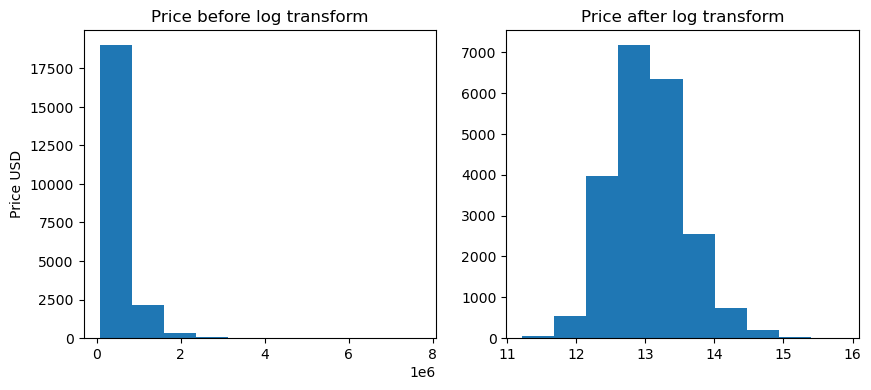

In [61]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 4))


ax1.hist(data['price'])
ax2.hist(price_transformed)
ax1.set_title("Price before log transform")
ax2.set_title("Price after log transform")
ax1.set_ylabel("Price USD")

plt.show()


In [62]:
data['price'] = price_transformed 
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,12.309982,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,13.195614,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,12.100712,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,13.311329,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,13.142166,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Apply scaler to normalise data. This ensures that each feature is treated equally when applying supervised learners.

In [63]:
scaler = MinMaxScaler()
numerical = ['price']
features_log_minmax_transform = pd.DataFrame(data = data)
features_log_minmax_transform[numerical] = scaler.fit_transform(data[numerical])
features_log_minmax_transform

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,0.234210,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,0.425429,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,0.189025,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,0.450414,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,0.413889,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,0.338685,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,0.361434,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,0.362565,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,0.361434,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


zipcode should probably be a categorical one hot encoded variable but for simplicity it will remain

In [64]:
y_col = "price"

X = data.drop(y_col, axis=1)
y = data[y_col]

In [65]:
print(X.shape, y.shape)

(21613, 19) (21613,)


In [66]:
y

0        12.309982
1        13.195614
2        12.100712
3        13.311329
4        13.142166
           ...    
21608    12.793859
21609    12.899220
21610    12.904459
21611    12.899220
21612    12.691580
Name: price, Length: 21613, dtype: float64

In [67]:
X

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [76]:
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 17290 samples.
Testing set has 4323 samples.


In [77]:
X_train.dtypes

id                 int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [12]:
#from sklearn.model_selection import train_test_split

#X_data =  features_log_minmax_transform[['total_cases','total_deaths','stringency_index','population','hdi']]
#y_data = features_log_minmax_transform['gdp_per_capita']

#X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 42)

#print("Training set has {} samples.".format(X_train.shape[0]))
#print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 22062 samples.
Testing set has 9456 samples.


# Train models

- Train the following models: Vanilla Linear, Ridge, Lasso, RidgeCV, LassoCV, Elastic Net
- Compare accuracy scores
- Compare root-mean square errors
- Plot the results: prediction vs actual

In [78]:
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

In [79]:
s = StandardScaler()
lr = LinearRegression()

X_train_s = s.fit_transform(X_train)
lr.fit(X_train_s, y_train)
X_test = s.transform(X_test)  
y_pred = lr.predict(X_test)
score = r2_score(y_test.values, y_pred)

estimator = Pipeline([("scaler", s),("regression", lr)])
predictions_lr = cross_val_predict(estimator, X_train, y_train, cv=kf)
linear_score = r2_score(y_train, predictions_lr)

linear_score, score 

(0.7679981631425202, 0.7758878517521216)

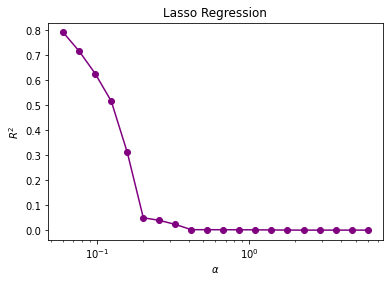

In [15]:
s = StandardScaler()
pf = PolynomialFeatures(degree=3)
kf = KFold(shuffle=True, random_state=72018, n_splits=3)
scores = []
alphas = np.geomspace(0.06, 6.0, 20)
predictions_lsr = []
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("make_higher_degree", pf),
        ("lasso_regression", las)])

    predictions_lsr = cross_val_predict(estimator, X_train, y_train, cv = kf)
    
    score = r2_score(y_train, predictions_lsr)
    
    scores.append(score)
plt.semilogx(alphas, scores, '-o', color='purple')
plt.title('Lasso Regression')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

In [81]:
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=0.03))])

best_estimator.fit(X_train, y_train)
lasso_score = best_estimator.score(X_train, y_train)

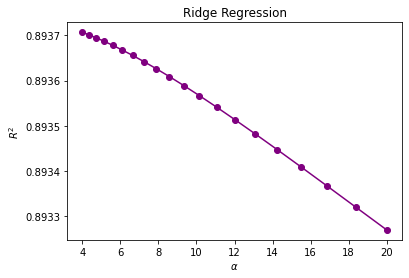

In [17]:
pf = PolynomialFeatures(degree=2)
alphas = np.geomspace(4, 20, 20)
scores=[]
predictions_rr = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000)

    estimator = Pipeline([
        ("scaler", s),
        ("polynomial_features", pf),
        ("ridge_regression", ridge)])

    predictions_rr = cross_val_predict(estimator, X_train, y_train, cv = kf)
    score = r2_score(y_train, predictions_rr)
    scores.append(score)

plt.plot(alphas, scores, '-o', color='purple')
plt.title('Ridge Regression')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

In [82]:
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("ridge_regression", Ridge(alpha=0.03))])

best_estimator.fit(X_train, y_train)
ridge_score = best_estimator.score(X_train, y_train)

In [84]:

pd.DataFrame([[linear_score, lasso_score, ridge_score]],columns=['linear', 'lasso', 'ridge'], index=['score'])

,linear,lasso,ridge
score,0.767998,0.770417,0.830972


**Conclusion**: Both Lasso and Ridge with proper hyperparameter tuning give better results than plain Linear Regression!

In [96]:
def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))


linearRegression = LinearRegression().fit(X_train, y_train)
linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]
ridgeCV = RidgeCV(alphas=alphas, cv=4).fit(X_train, y_train)
ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))

alphas2 = np.array([0.00001, 0.00005, 0.0001, 0.0005])
lassoCV = LassoCV(alphas=alphas2,
                  max_iter=50000,
                  cv=3).fit(X_train, y_train)
lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))

l1_ratios = np.linspace(0.1, 0.9, 9)
elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=10000).fit(X_train, y_train)
elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test))


rmse_vals = [linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

labels = ['Linear', 'Lasso', 'Ridge' 'ElasticNet']

rmse_df = pd.DataFrame([[linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]],columns=['Linear', 'Lasso', 'Ridge', 'ElasticNet'], index=['rmse'])
rmse_df

,Linear,Lasso,Ridge,ElasticNet
rmse,20.752802,20.757765,20.745862,20.747825


[Text(0.5, 0, 'Actual'),
 Text(0, 0.5, 'Predicted'),
 Text(0.5, 1.0, 'Linear Regression Results')]

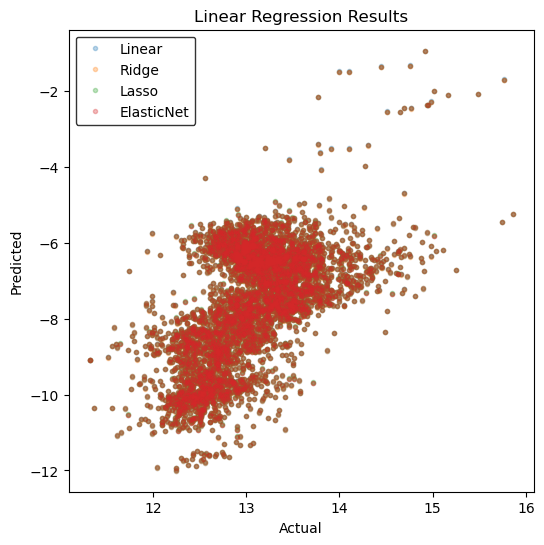

In [102]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

labels, models = ['Linear', 'Ridge', 'Lasso', 'ElasticNet'], [linearRegression, ridgeCV, lassoCV, elasticNetCV]

for mod, label in zip(models, labels):
    ax.plot(y_test, mod.predict(X_test), marker='o', ls='', ms=3.0, label=label, alpha=0.3)
    
leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual', ylabel='Predicted', title='Linear Regression Results')

# Next Steps

We might attempt Lasso optimization again with GridSearchCV.


We could use the location or iso_code columns to one-hot encode and use that to train our models in order to forecast the impact on GDP for a specific nation. It might be possible to obtain more accurate results by keeping more frequent records on particular countries.